# Pima Indians Diabetic Dataset -Analysis of data

In [188]:
#import the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import linear_model
%matplotlib inline
sns.set(color_codes=True)

# Loading Data and Information

In [189]:
#load the data
diabetes=pd.read_csv('diabetes.csv')

In [190]:
#check the first five rows of data
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [191]:
#Get the information about the data  - datatype ,number of rows&columns, non null values,memory usage
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


It can be observed that there are no null values in the data set.
Also all the columns except for outcome is continous numerical data.

In [192]:
#Get the statistical details about the data
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


The minimum value is given as zero for columns - pregnancies, glucose, blood pressure , skin thickness , Insulin , BMI.
This is not biologically correct except for pregnancies.
so this indicates that there are missing data.

#  Missing data Analysis

In [194]:
#check the count to find if there are many missing values (zero in the column)
diabetes[diabetes == 0].count()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

For pregrancies column , it can be true that the number of pregnancies reported be zero. so not considering that as a missing value.

For Glucose, BMI and Blood pressure , the number of missing values are low compared to Insulin and SkinThickness.

One more interesting observation is that out of 768 given records , 500 records have Diabetes negative (outcome).This is an important criteria to consider while splitting the training and testing dataset.

In [195]:
#check the relation between missing data
data_missing_insulin_skinthickness = diabetes[(diabetes['SkinThickness']==0) & (diabetes['Insulin']==0)]
data_missing_insulin_skinthickness.count()


Pregnancies                 227
Glucose                     227
BloodPressure               227
SkinThickness               227
Insulin                     227
BMI                         227
DiabetesPedigreeFunction    227
Age                         227
Outcome                     227
dtype: int64

From the above, we can assume that the data is missing together for both Insulin and SkinThickness

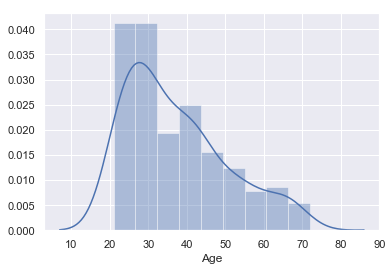

In [197]:
sns.distplot(data_missing_insulin_skinthickness['Age'])
plt.show()

The data is missing mainly for people of age group between 20 to 30

# Missing Data Imputation

In [198]:
# trying to impute the value
diabetes_imputed = diabetes.copy()
diabetes_imputed[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_imputed[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

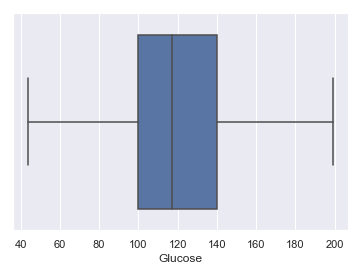

In [201]:
#view the distribution to know what fits best to impute
sns.boxplot(diabetes_imputed['Glucose'])
plt.show()

In [202]:
#from the above plot , it can be seen that the data does not have outliers and the data is not skewed
#so the data can be imputed with mean value
diabetes_imputed['Glucose'].fillna(diabetes_imputed['Glucose'].mean(),inplace=True)

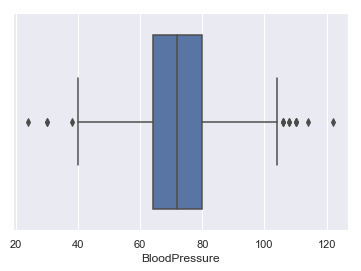

In [203]:
sns.boxplot(diabetes_imputed['BloodPressure'])
plt.show()

In [204]:
#from the above plot , it can be seen that the data has outliers on both sides and there is no skewness
#so the data can be imputed with mean value
diabetes_imputed['BloodPressure'].fillna(diabetes_imputed['BloodPressure'].mean(),inplace=True)

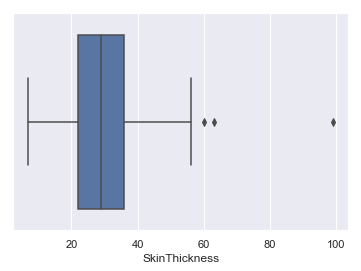

In [205]:
sns.boxplot(diabetes_imputed['SkinThickness'])
plt.show()

In [206]:
#from the above plot , it can be seen that the data has outliers on one sides 
#so the data can be imputed with median value
diabetes_imputed['SkinThickness'].fillna(diabetes_imputed['SkinThickness'].median(), inplace = True)

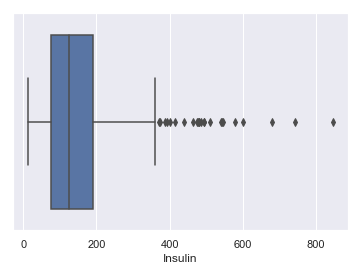

In [207]:
sns.boxplot(diabetes_imputed['Insulin'])
plt.show()

In [208]:
#from the above plot , it can be seen that the data has outliers on one side
#so the data can be imputed with median value
diabetes_imputed['Insulin'].fillna(diabetes_imputed['Insulin'].median(),inplace=True)

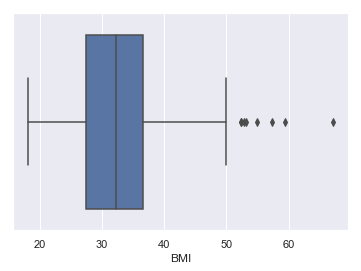

In [209]:
sns.boxplot(diabetes_imputed['BMI'])
plt.show()

In [211]:
#from the above plot , it can be seen that the data has outliers on one side 
#so the data can be imputed with median value
diabetes_imputed['BMI'].fillna(diabetes_imputed['BMI'].median(), inplace = True)

In [212]:
#verify all the nan values are filled
diabetes_imputed[diabetes_imputed.isnull()].count()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

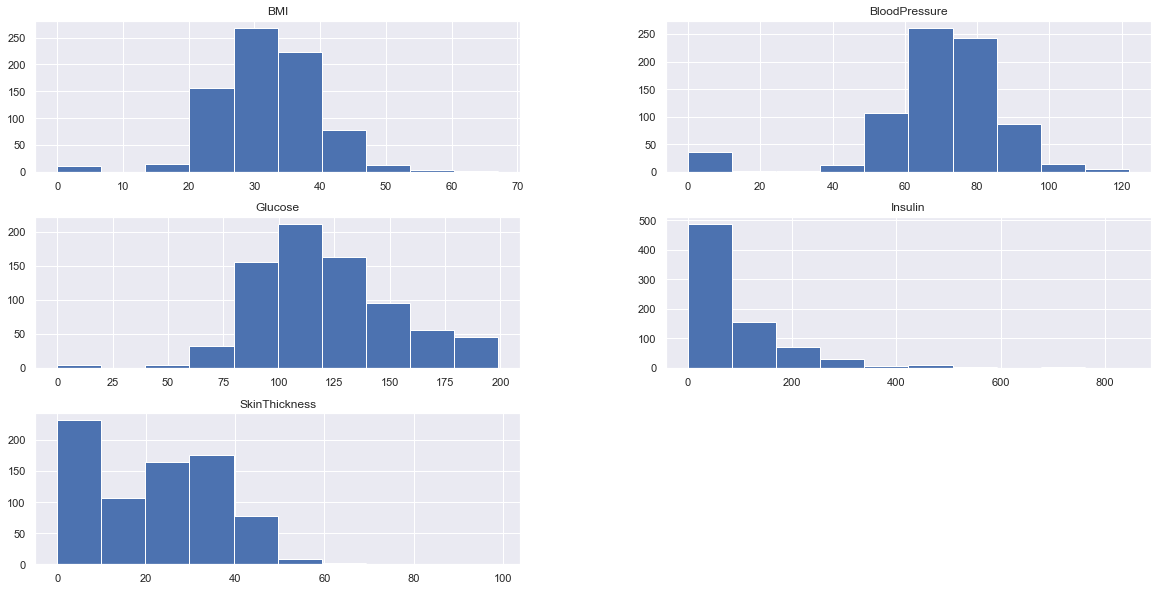

In [214]:
#comparing the distribution between original , imputed and data_dropping_out_missing_values
#Original data
diabetes.hist(column=['BMI','BloodPressure','Insulin','Glucose','SkinThickness'],figsize=(20,10))
plt.show()

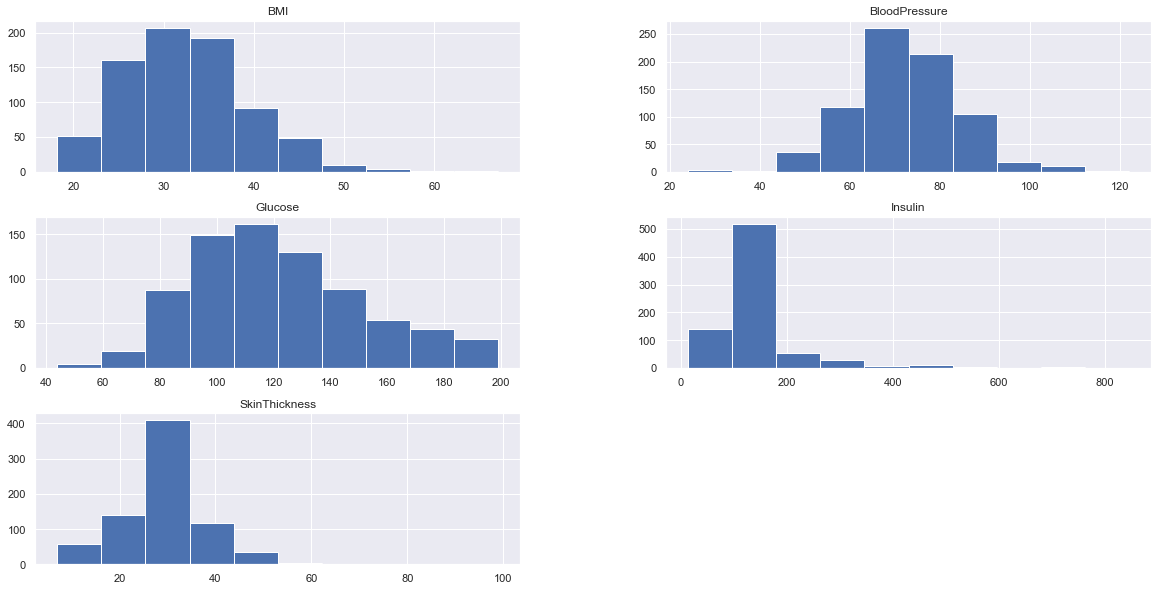

In [215]:
#imputed data
diabetes_imputed.hist(column=['BMI','BloodPressure','Insulin','Glucose','SkinThickness'],figsize=(20,10))
plt.show()

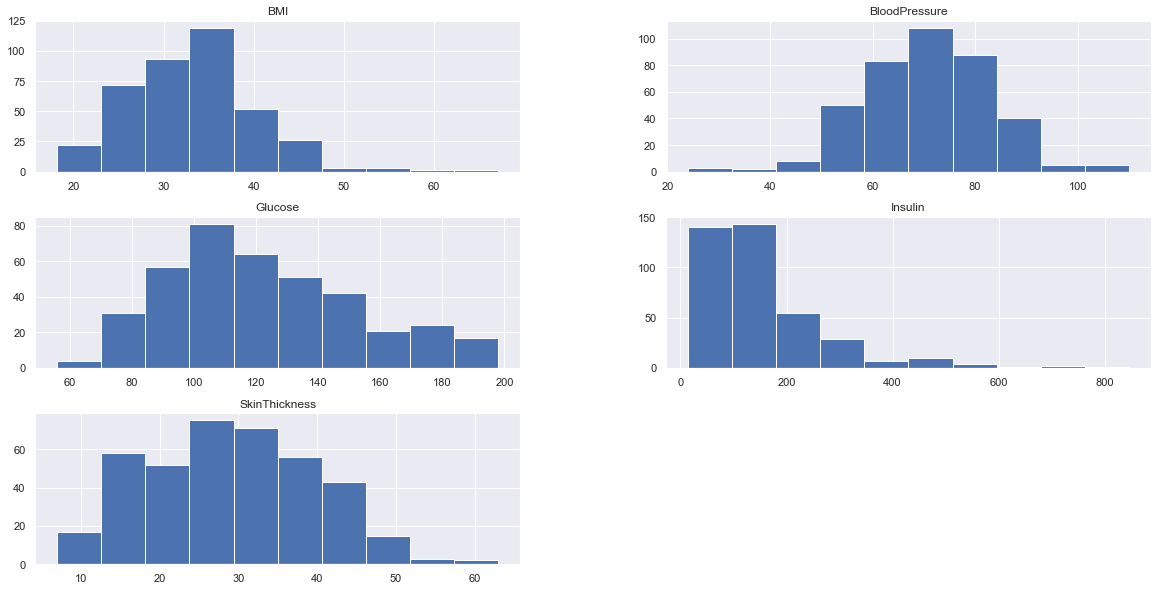

In [216]:
#data_dropping_out_missing_values
diabetes_dropping_out_missing_values = diabetes.copy()
diabetes_dropping_out_missing_values[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_dropping_out_missing_values[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
diabetes_dropping_out_missing_values.dropna(inplace=True)
diabetes_dropping_out_missing_values.hist(column=['BMI','BloodPressure','Insulin','Glucose','SkinThickness'],figsize=(20,10))
plt.show()

On observation , after imputation or dropping out the data distribution around the central region has increased.


# Univariant Analysis

In [217]:
#check the statistics after imputation
diabetes_imputed.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.00000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.25000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.000000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.000000,127.25000,846.00
BMI,768.0,32.455208,6.875177,18.200,27.50000,32.300000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.00000,1.00


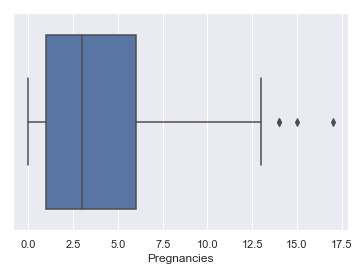

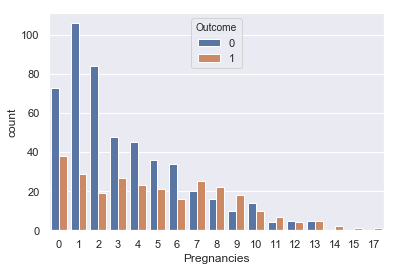

In [218]:
sns.boxplot(x='Pregnancies',data=diabetes_imputed)
plt.show()
sns.countplot(diabetes_imputed['Pregnancies'], hue =diabetes_imputed['Outcome'])
plt.show()

Pregnancies data has outliers on the right hand side which means there are people who have reported pregnancies more than 13 times.
The data is right skewed.
The data has 111 records who have reported zero pregnancies.
The number of pregnancy witht the maximum frequency is 1. 
The standard deviation is also high which is 3.369578 for a range of 17.

It can be observed that the persons with Pregnancy rate 7 to 9 are tend to be more diabetic

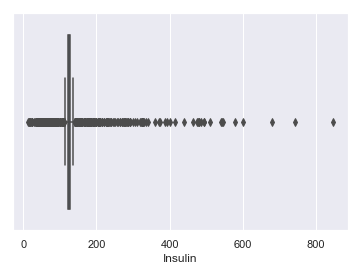

In [219]:
sns.boxplot(x='Insulin',data=diabetes_imputed)
plt.show()


Insulin data has many outliers

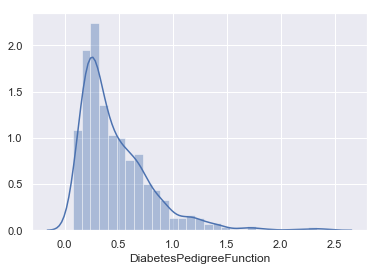

In [220]:
sns.distplot(diabetes_imputed['DiabetesPedigreeFunction'])
plt.show()

DiabetesPedigreeFunction has an average around 0.5

# Bivariant Analysis

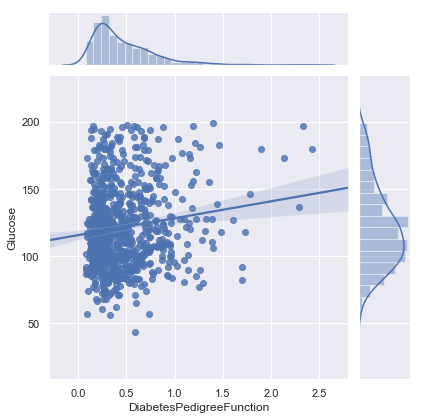

In [221]:
sns.jointplot(diabetes_imputed['DiabetesPedigreeFunction'], diabetes_imputed['Glucose'], kind = 'reg')
plt.show()

A positive correlation can be observed between DiabetesPedigreeFunction and Glucose

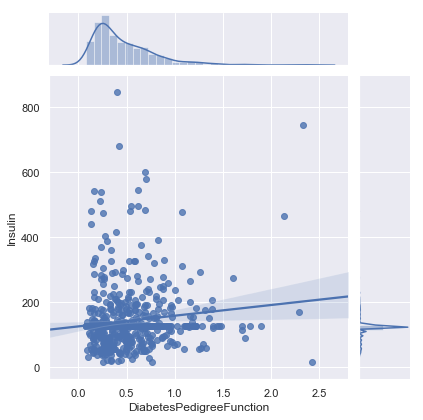

In [222]:
sns.jointplot(diabetes_imputed['DiabetesPedigreeFunction'], diabetes_imputed['Insulin'], kind = 'reg')
plt.show()

A positive correlation can be observed between DiabetesPedigreeFunction and Insulin

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


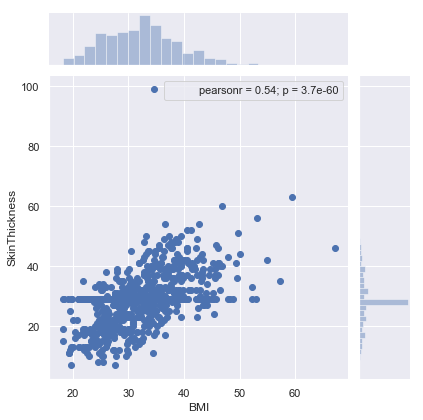

In [139]:
j=sns.jointplot(diabetes_imputed['BMI'], diabetes_imputed['SkinThickness'])
j.annotate(stats.pearsonr)
plt.show()

# Analysis by Grouping the data

In [223]:
#define a function to group diabetic and non diabetic records to
def plot_column_grouped_by_Outcome(column):
    grouped_by_Outcome = diabetes_imputed[column].groupby(diabetes_imputed["Outcome"])
    diabetic_grouped = pd.DataFrame({"Diabetic": grouped_by_Outcome.get_group(1),
                                        "Non-diabetic": grouped_by_Outcome.get_group(0),
                                        })
    hist = diabetic_grouped.plot.hist()
    hist.set_xlabel(column)
    plt.show()

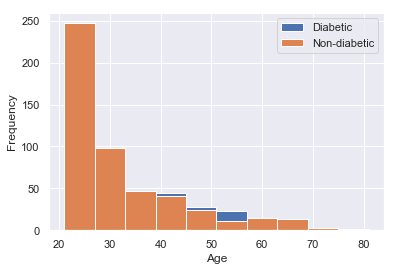

In [224]:
plot_column_grouped_by_Outcome('Age')

It can be observed that the diabetic persons are found between the age group 40 to 60.

Also the data is found to be right skewed.

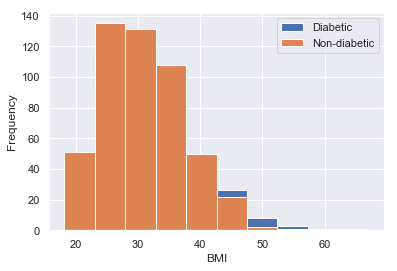

In [225]:
plot_column_grouped_by_Outcome('BMI')

It can be observed that the diabetic persons are found to be with higher BMI value (more than 40 kg/m^2)

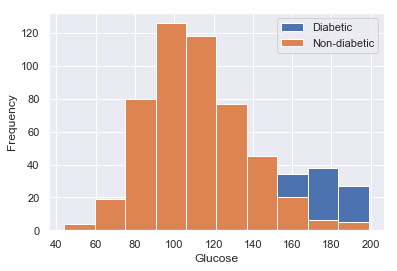

In [226]:
plot_column_grouped_by_Outcome('Glucose')

It can be observed that the diabetic persons are found to be with higher Glucose value (more than 150)

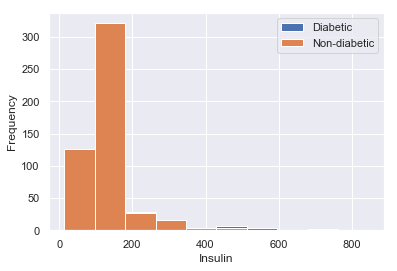

In [153]:
plot_column_grouped_by_Outcome('Insulin')

It can be observed that the diabetic persons are found to be with higher Insulin value (more than 400 mu U/ml)

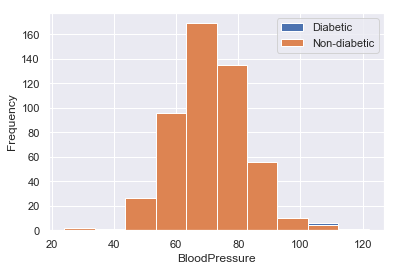

In [227]:
plot_column_grouped_by_Outcome('BloodPressure')

It can be observed that the diabetic persons are found to be with higher Blood pressure value (more than 100 mm Hg)

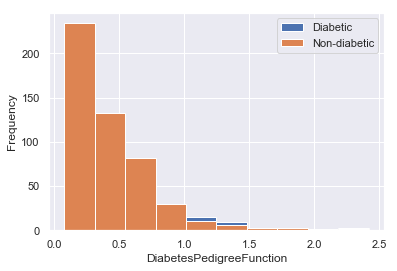

In [228]:
plot_column_grouped_by_Outcome('DiabetesPedigreeFunction')

It can be observed that the diabetic persons are found to have value more than 1

# Multi variant Analysis

/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


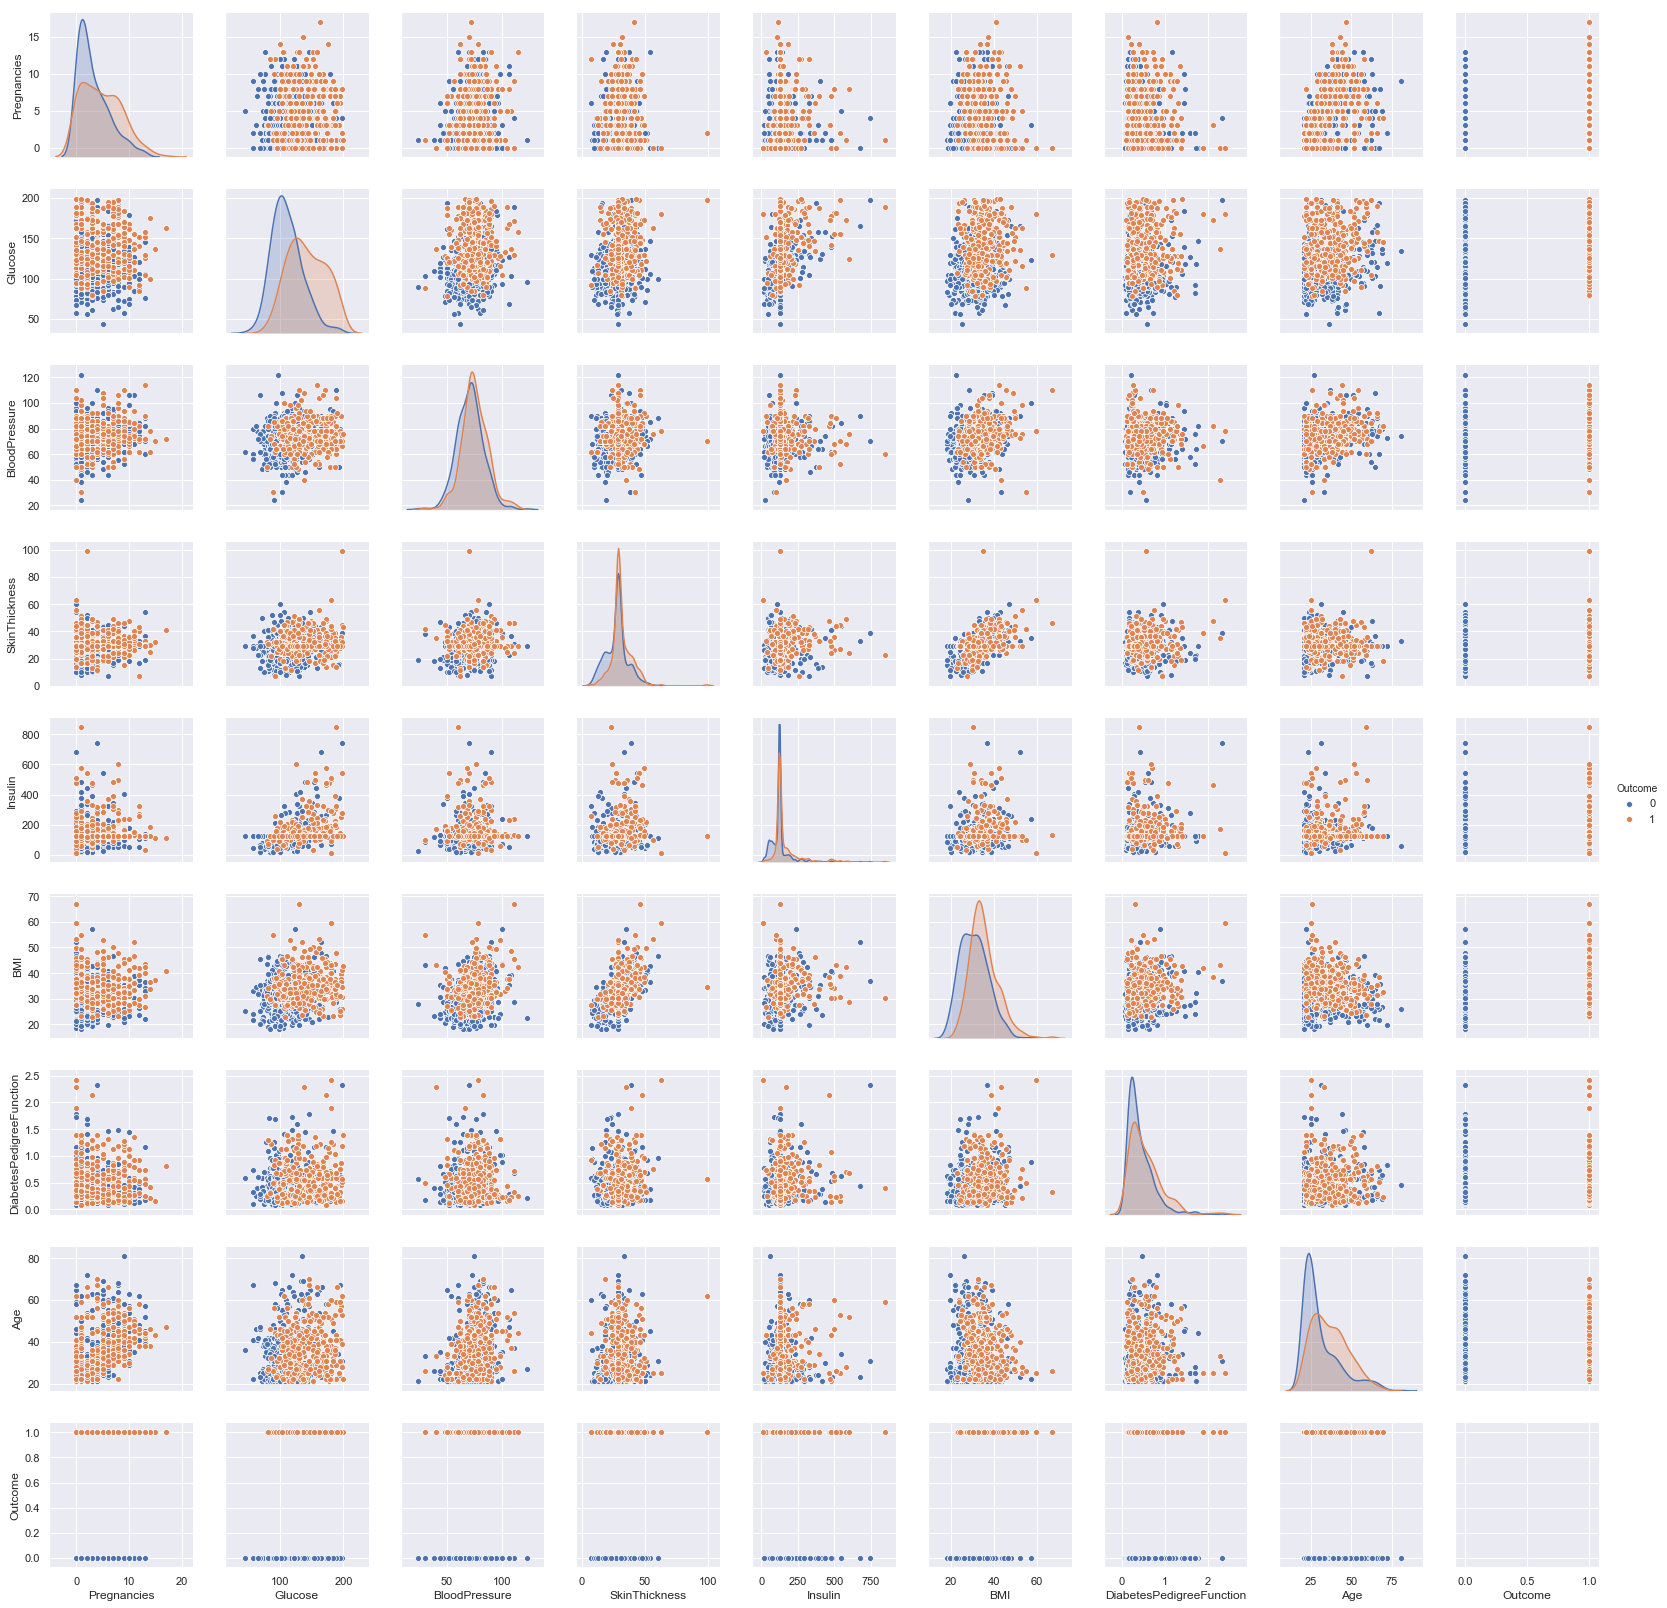

In [229]:
sns.pairplot(diabetes_imputed ,hue ='Outcome')
plt.show()

The scatterplot shows that no two attribute can clearly distinguish between outcome 0 and 1

In [230]:
corr = diabetes_imputed.corr()

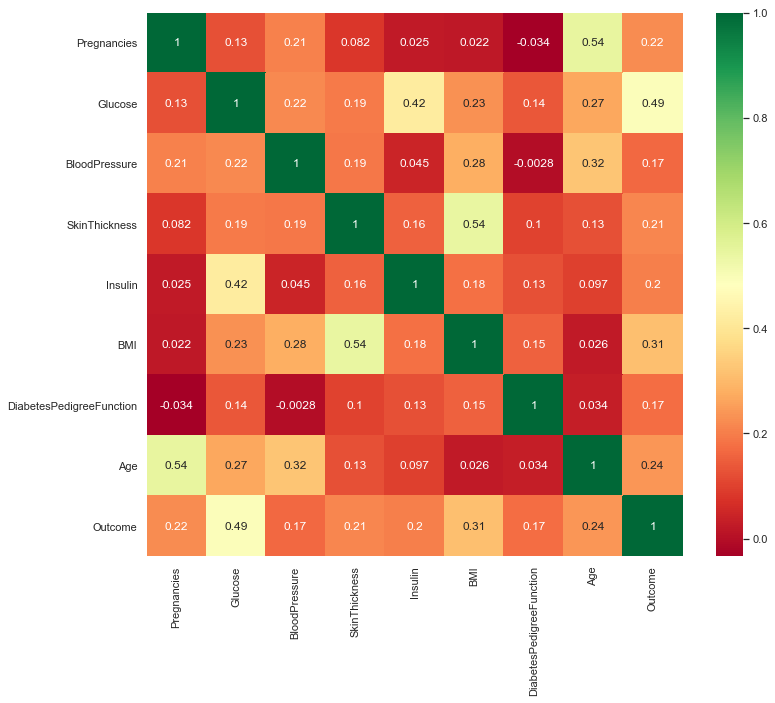

In [231]:
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True,cmap ='RdYlGn')
plt.show()

The heatmap shows that the columns are weakly correlated with each other.
The highest correlation found is 0.54 which is between Age and Pregnancies ,BMI and skinThickness.
The DiabetesPedigreeFunction is weakly correlated with all the fields including the Outcome.


The highest correlation for Outcome is with Glucose followed by BMI , Age and Pregnancies.


# Summary

# Title: Older Women with High Pregnancy rate , Higher BMI are Prone to be diabetic


Observations :

From the given data , the Glucose ,BMI , Age and Pregnancies are the most correlated characteristics with Outcome.
Glucose is obvious as it is the science behind diabetes.

A person with higher Glucose level ,higher BMI , higher Age, higher Pregnancy are prone to be diabetic.

Blood Pressure , DiabetesPedigreeFunction,Insulin level have less correlation with Outcome.

BMI and SkinThickness has more correlation with each other.It may be that person with higher BMI tend to have thicker Skin.

Similarly Age and Pregnancies have higher correlation with each other.This is also relatable.

There are many missing data in the record mainly for Insulin and SkinThickness especially in the age group between 20 to 30

There are many Outliers in the dataset mainly for Insulin.People tend to have higher variations in their Insulin level.

